In [1]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
#own functions
import functions as f

#accessing aws data
import sys
sys.path.append('../utils')
from db_utils import DBUtil 

#for ipython display
import matplotlib.pyplot as plt
from IPython.display import display, HTML
%matplotlib inline
pd.set_option('display.height', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 500)

In [2]:
#connect to aws
dbu = DBUtil("komodo_redshift","../../databases/database.conf")

In [3]:
%%time
query = """
select ilink,
count(*) as N_Pants2018 
from jjill.jjill_keyed_data
where is_emailable_ind='Y'
and department_name = 'Pants'
and order_date between '2018-01-01' and '2018-04-30'
group by 1 order by 1;
"""
DF3 = dbu.get_df_from_query(query)
DF3.columns = map(str.upper,DF3.columns)

CPU times: user 305 ms, sys: 96.3 ms, total: 402 ms
Wall time: 3.83 s


In [4]:
DF1 = pd.read_pickle('../data/numeric_ft_q32017.pkl')
DF2 = pd.read_pickle('../data/categorical_Q32017.pkl')
DF1.columns = map(str.upper, DF1.columns)
DF2.columns = map(str.upper, DF2.columns)

In [5]:
DF = DF1.merge(DF2,on=['ILINK','DEPARTMENT_NAME'])
DF = DF.merge(DF3,how='outer',on='ILINK')

In [6]:
DF['N_PANTS2018'].fillna(0,inplace=True)

In [7]:
print DF.shape
DF.head(5)

(989603, 76)


,ILINK,DEPARTMENT_NAME,TOTAL_BOUGHT,SHIPPED_SOLD_AMT,AVG_SHIPPED_SOLD_AMT,STD_SHIPPED_SOLD_AMT,VAR_SHIPPED_SOLD_AMT,DISCOUNT,AVG_DISCOUNT,STD_DISCOUNT,VAR_DISCOUNT,ENDUSE_HAS_WEAREVER,ENDUSE_HAS_CORE,ENDUSE_HAS_PUREJILL,MASTERCHANNEL_HAS_D,MASTERCHANNEL_HAS_R,PAYTYPE_HAS_JJC,PAYTYPE_HAS_VISA,PAYTYPE_HAS_MC,PAYTYPE_HAS_AMEX,PAYTYPE_HAS_DISC,PAYTYPE_HAS_DEBIT,PAYTYPE_HAS_CASH,PAYTYPE_HAS_CK,PAYTYPE_HAS_OTHER,FABRICCATEGORY_HAS_SYNTHETIC/SYNBLEND,FABRICCATEGORY_HAS_PIMA,FABRICCATEGORY_HAS_RAYON/RAYONBL,FABRICCATEGORY_HAS_COTTON/COTTONBL,FABRICCATEGORY_HAS_LINEN/LINENBL,FABRICCATEGORY_HAS_DENIM,FABRICCATEGORY_HAS_OTHER,FABRICCATEGORY_HAS_PONTE,FABRICCATEGORY_HAS_SLUB,FABRICCATEGORY_HAS_CORDUROY,FABRICCATEGORY_HAS_POLY/POLYBL,FABRICCATEGORY_HAS_CHAMBRAY,FABRICCATEGORY_HAS_FRENCHTERRY,FABRICCATEGORY_HAS_GOSSAMER,FABRICCATEGORY_HAS_CHINO,FABRICCATEGORY_HAS_HISTORICAL,FABRICCATEGORY_HAS_SILK/SILKBL,FABRICCATEGORY_HAS_CREPE,ENDUSE_%_WEAREVER,ENDUSE_%_CORE,ENDUSE_%_PUREJILL,MASTERCHANNEL_%_D,MASTERCHANNEL_%_R,PAYTYPE_%_JJC,PAYTYPE_%_VISA,PAYTYPE_%_MC,PAYTYPE_%_AMEX,PAYTYPE_%_DISC,PAYTYPE_%_DEBIT,PAYTYPE_%_CASH,PAYTYPE_%_CK,PAYTYPE_%_OTHER,FABRICCATEGORY_%_SYNTHETIC/SYNBLEND,FABRICCATEGORY_%_PIMA,FABRICCATEGORY_%_RAYON/RAYONBL,FABRICCATEGORY_%_COTTON/COTTONBL,FABRICCATEGORY_%_LINEN/LINENBL,FABRICCATEGORY_%_DENIM,FABRICCATEGORY_%_OTHER,FABRICCATEGORY_%_PONTE,FABRICCATEGORY_%_SLUB,FABRICCATEGORY_%_CORDUROY,FABRICCATEGORY_%_POLY/POLYBL,FABRICCATEGORY_%_CHAMBRAY,FABRICCATEGORY_%_FRENCHTERRY,FABRICCATEGORY_%_GOSSAMER,FABRICCATEGORY_%_CHINO,FABRICCATEGORY_%_HISTORICAL,FABRICCATEGORY_%_SILK/SILKBL,FABRICCATEGORY_%_CREPE,N_PANTS2018
0,0000000004,Pants,4.0,184.58,46.145,19.286749,371.97870,93.4,23.35,5.062608,25.630,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0000000004,Knit Tops,5.0,154.57,30.914,10.387051,107.89083,83.4,16.68,2.977751,8.867,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8,0.2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0000000049,Pants,2.0,62.30,31.150,44.052752,1940.64500,26.7,13.35,18.879751,356.445,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0000000088,Pants,2.0,124.60,62.300,0.000000,0.00000,53.4,26.70,0.000000,0.000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0000000088,Knit Tops,1.0,30.80,30.800,NaN,NaN,13.2,13.20,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
DFPants = DF[DF.DEPARTMENT_NAME=='Pants']
print DFPants.shape

(246940, 76)


In [9]:
NUMERIC_FTS = ['TOTAL_BOUGHT','SHIPPED_SOLD_AMT','AVG_SHIPPED_SOLD_AMT',
       'STD_SHIPPED_SOLD_AMT','VAR_SHIPPED_SOLD_AMT','DISCOUNT',
       'AVG_DISCOUNT','STD_DISCOUNT','VAR_DISCOUNT','N_PANTS2018']
CATEG_FTS = ['ENDUSE_Has_Core','ENDUSE_Has_Wearever',
 'ENDUSE_Has_PureJill','PAYTYPE_Has_JJC','PAYTYPE_Has_VISA',
 'PAYTYPE_Has_MC','PAYTYPE_Has_AMEX','PAYTYPE_Has_DISC','PAYTYPE_Has_DEBIT',
 'PAYTYPE_Has_CASH','PAYTYPE_Has_CK','PAYTYPE_Has_OTHER','FABRICCATEGORY_Has_Cotton/CottonBl',
 'FABRICCATEGORY_Has_Synthetic/SynBlend','FABRICCATEGORY_Has_Linen/LinenBl',
 'ENDUSE_%_Core','ENDUSE_%_Wearever','ENDUSE_%_PureJill',
 'PAYTYPE_%_JJC','PAYTYPE_%_VISA','PAYTYPE_%_MC','PAYTYPE_%_AMEX','PAYTYPE_%_DISC',
 'PAYTYPE_%_DEBIT','PAYTYPE_%_CASH','PAYTYPE_%_CK','PAYTYPE_%_OTHER',
 'FABRICCATEGORY_%_Cotton/CottonBl','FABRICCATEGORY_%_Synthetic/SynBlend',
 'FABRICCATEGORY_%_Linen/LinenBl','N_PANTS2018']
CATEG_FTS = map(str.upper,CATEG_FTS)

# Pants Customers Only

## Numeric Fts Correlations/Scatter Matrix

,TOTAL_BOUGHT,N_PANTS2018
TOTAL_BOUGHT,1.000000,0.258879
N_PANTS2018,0.258879,1.000000


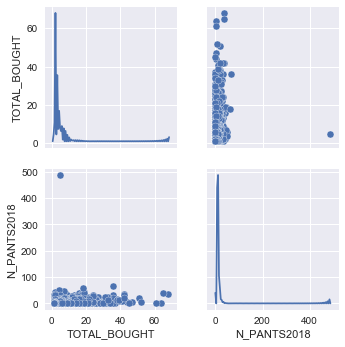

In [10]:
fts = [NUMERIC_FTS[0]]+['N_PANTS2018']
display(DFPants[fts].corr())
sns.pairplot(DFPants[:100000],vars=fts,diag_kind='kde');

ERROR! Session/line number was not unique in database. History logging moved to new session 760


,SHIPPED_SOLD_AMT,AVG_SHIPPED_SOLD_AMT,STD_SHIPPED_SOLD_AMT,VAR_SHIPPED_SOLD_AMT,N_PANTS2018
SHIPPED_SOLD_AMT,1.000000,0.188567,0.229597,0.119207,0.240795
AVG_SHIPPED_SOLD_AMT,0.188567,1.000000,0.017300,0.000057,-0.029585
STD_SHIPPED_SOLD_AMT,0.229597,0.017300,1.000000,0.912300,0.049414
VAR_SHIPPED_SOLD_AMT,0.119207,0.000057,0.912300,1.000000,0.013497
N_PANTS2018,0.240795,-0.029585,0.049414,0.013497,1.000000


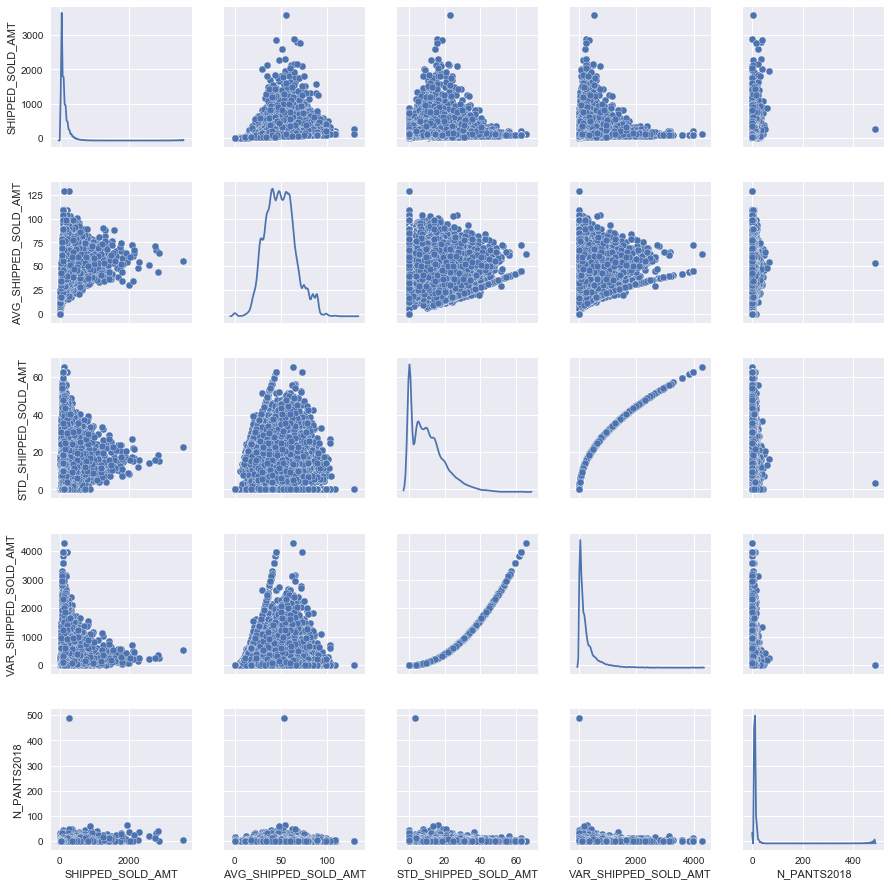

In [14]:
fts = NUMERIC_FTS[1:5]+['N_PANTS2018']
display(DFPants[fts].corr())
sns.pairplot(DFPants[:100000],vars=fts,diag_kind='kde');

,DISCOUNT,AVG_DISCOUNT,STD_DISCOUNT,VAR_DISCOUNT,N_PANTS2018
DISCOUNT,1.000000,0.396275,0.211978,0.108368,0.235981
AVG_DISCOUNT,0.396275,1.000000,0.030708,0.001915,0.016380
STD_DISCOUNT,0.211978,0.030708,1.000000,0.926720,0.068255
VAR_DISCOUNT,0.108368,0.001915,0.926720,1.000000,0.033827
N_PANTS2018,0.235981,0.016380,0.068255,0.033827,1.000000


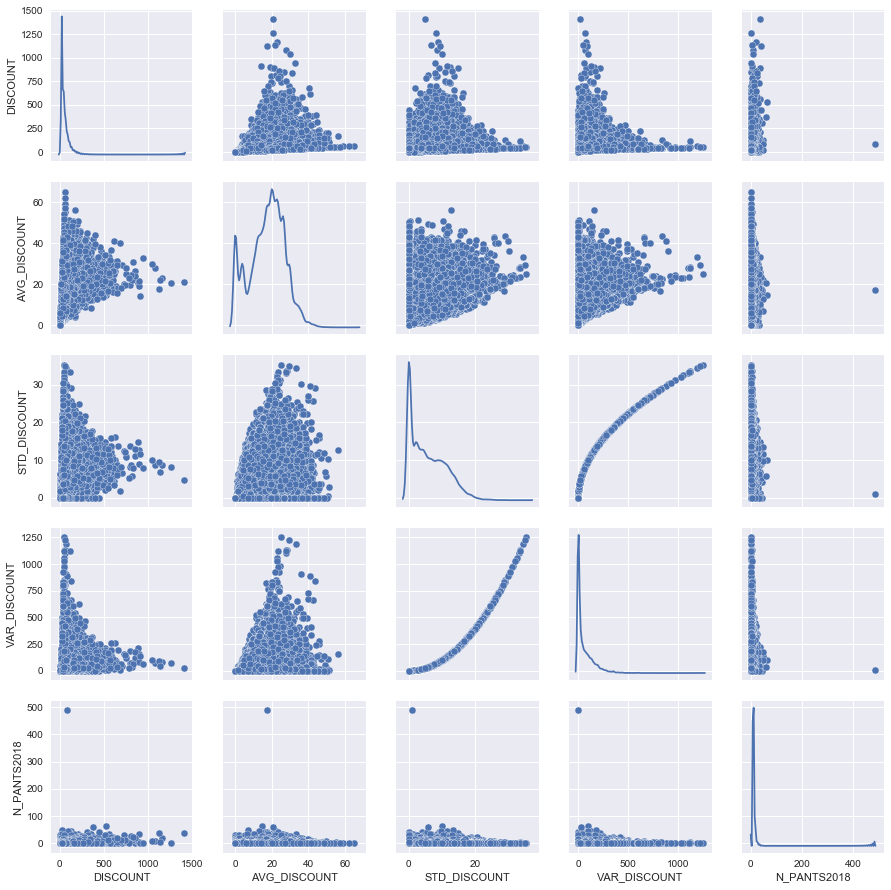

In [15]:
fts = NUMERIC_FTS[5:]
display(DFPants[fts].corr())
sns.pairplot(DFPants[:100000],vars=fts,diag_kind='kde');

## Categorical Fts Correlation/Scatter Matrix

In [13]:
#fts = CATEG_FTS[0:3]+['N_PANTS2018']
#display(DFPants[fts].corr())
#sns.pairplot(DFPants,vars=fts,diag_kind='kde');

In [14]:
#fts = CATEG_FTS[3:6]+['N_PANTS2018']
#display(DFPants[fts].corr())
#sns.pairplot(DFPants,vars=fts,diag_kind='kde');

In [15]:
#fts = CATEG_FTS[6:9]+['N_PANTS2018']
#display(DFPants[fts].corr())
#sns.pairplot(DFPants,vars=fts,diag_kind='kde');

In [16]:
#fts = CATEG_FTS[9:12]+['N_PANTS2018']
#display(DFPants[fts].corr())
#sns.pairplot(DFPants,vars=fts,diag_kind='kde');

In [17]:
#fts = CATEG_FTS[12:15]+['N_PANTS2018']
#display(DFPants[fts].corr())
#g = sns.pairplot(DFPants,vars=fts,diag_kind='kde',size=4);

,ENDUSE_%_CORE,ENDUSE_%_WEAREVER,ENDUSE_%_PUREJILL,N_PANTS2018
ENDUSE_%_CORE,1.000000,-0.566908,-0.749571,-0.027938
ENDUSE_%_WEAREVER,-0.566908,1.000000,-0.120342,-0.009364
ENDUSE_%_PUREJILL,-0.749571,-0.120342,1.000000,0.041196
N_PANTS2018,-0.027938,-0.009364,0.041196,1.000000


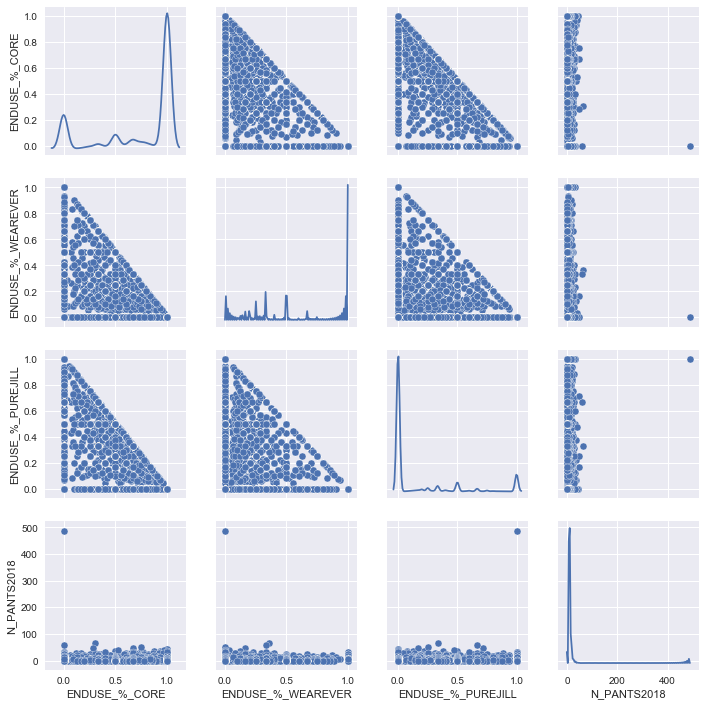

In [16]:
fts = CATEG_FTS[15:18]+['N_PANTS2018']
display(DFPants[fts].corr())
sns.pairplot(DFPants[:100000],vars=fts,diag_kind='kde');

,PAYTYPE_%_JJC,PAYTYPE_%_VISA,PAYTYPE_%_MC,N_PANTS2018
PAYTYPE_%_JJC,1.000000,-0.601862,-0.324449,0.108095
PAYTYPE_%_VISA,-0.601862,1.000000,-0.195500,-0.070479
PAYTYPE_%_MC,-0.324449,-0.195500,1.000000,-0.037582
N_PANTS2018,0.108095,-0.070479,-0.037582,1.000000


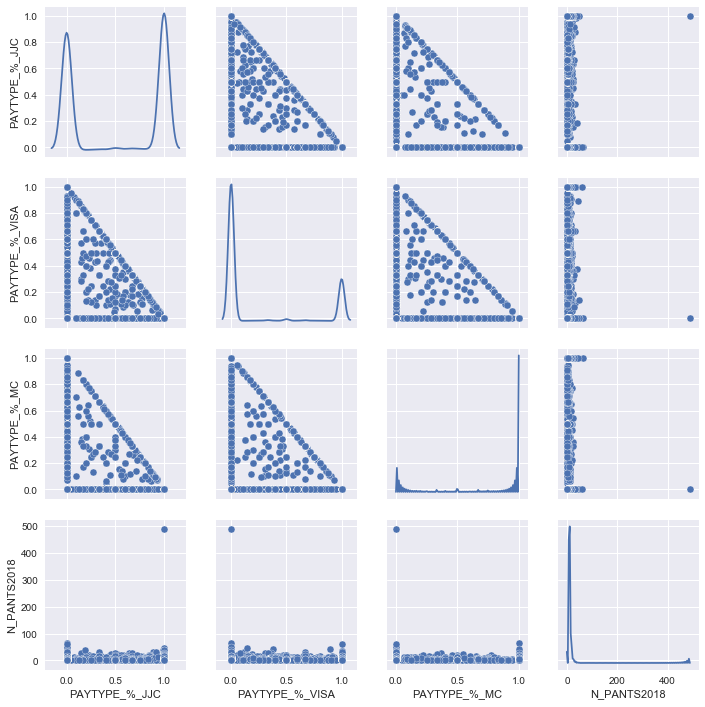

In [17]:
fts = CATEG_FTS[18:21]+['N_PANTS2018']
display(DFPants[fts].corr())
sns.pairplot(DFPants[:100000],vars=fts,diag_kind='kde');

,PAYTYPE_%_AMEX,PAYTYPE_%_DISC,PAYTYPE_%_DEBIT,N_PANTS2018
PAYTYPE_%_AMEX,1.000000,-0.036315,-0.047534,-0.009817
PAYTYPE_%_DISC,-0.036315,1.000000,-0.026133,-0.017014
PAYTYPE_%_DEBIT,-0.047534,-0.026133,1.000000,-0.025339
N_PANTS2018,-0.009817,-0.017014,-0.025339,1.000000


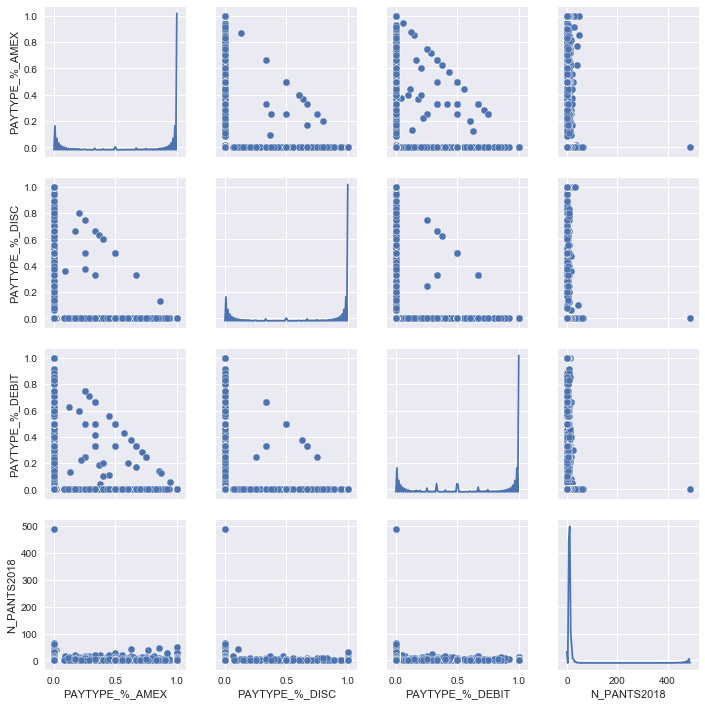

In [18]:
fts = CATEG_FTS[21:24]+['N_PANTS2018']
display(DFPants[fts].corr())
sns.pairplot(DFPants[:100000],vars=fts,diag_kind='kde');

,PAYTYPE_%_CASH,PAYTYPE_%_CK,PAYTYPE_%_OTHER,N_PANTS2018
PAYTYPE_%_CASH,1.000000,0.000299,-0.007978,-0.014838
PAYTYPE_%_CK,0.000299,1.000000,-0.002960,-0.003799
PAYTYPE_%_OTHER,-0.007978,-0.002960,1.000000,-0.010767
N_PANTS2018,-0.014838,-0.003799,-0.010767,1.000000


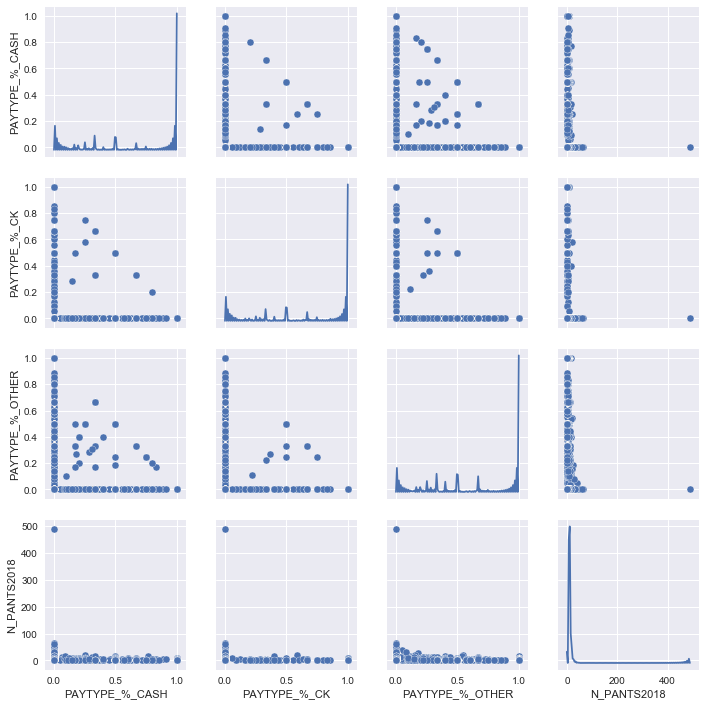

In [19]:
fts = CATEG_FTS[24:27]+['N_PANTS2018']
display(DFPants[fts].corr())
sns.pairplot(DFPants[:100000],vars=fts,diag_kind='kde');

,FABRICCATEGORY_%_COTTON/COTTONBL,FABRICCATEGORY_%_SYNTHETIC/SYNBLEND,FABRICCATEGORY_%_LINEN/LINENBL,N_PANTS2018
FABRICCATEGORY_%_COTTON/COTTONBL,1.000000,-0.329041,-0.377159,0.032515
FABRICCATEGORY_%_SYNTHETIC/SYNBLEND,-0.329041,1.000000,-0.135232,-0.004892
FABRICCATEGORY_%_LINEN/LINENBL,-0.377159,-0.135232,1.000000,-0.023839
N_PANTS2018,0.032515,-0.004892,-0.023839,1.000000


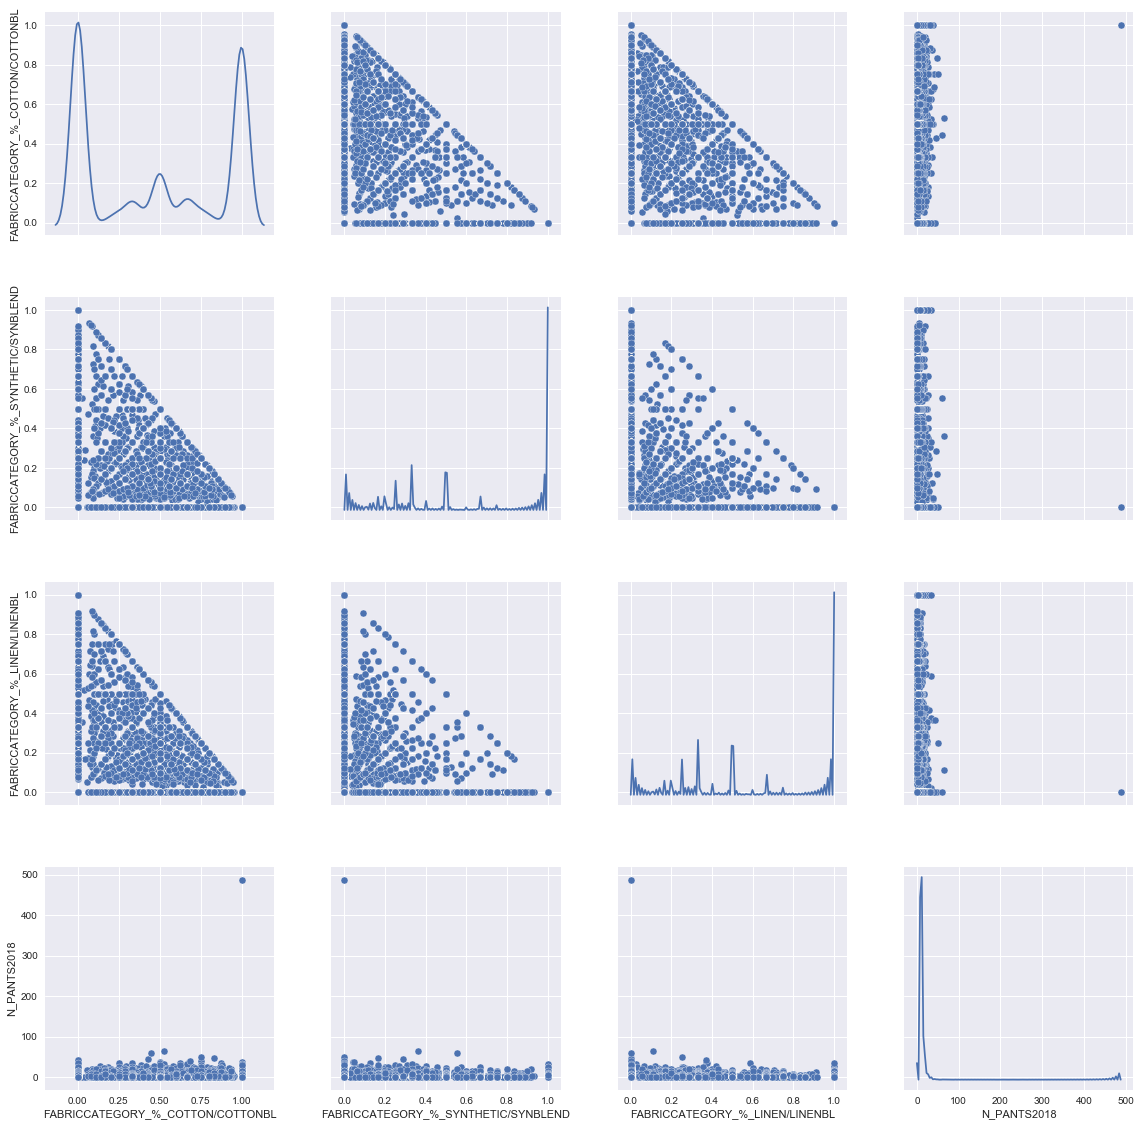

In [20]:
fts = CATEG_FTS[27:30]+['N_PANTS2018']
display(DFPants[fts].corr())
sns.pairplot(DFPants[:100000],vars=fts,diag_kind='kde',size=4);